In [1]:
###########################
# ONE TIME SETUP FOR DATA #
###########################

import os, shutil
orig_dir = 'C:\\Users\\Admin\\Documents\\Coding\\Deep Learning With Python\\train'
base_dir = 'C:\\Users\\Admin\\Documents\\Coding\\Deep Learning With Python\\CatDogSmall'
# # os.mkdir(base_dir) # - run once, makes directory
train_dir = os.path.join(base_dir,'train')
# #os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# #os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
# #os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
# #os.mkdir(train_cats_dir)
# #os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# #os.mkdir(validation_cats_dir)
# #os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_cats_dir)
#os.mkdir(test_dogs_dir)
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(orig_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src,dst)
    
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(orig_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src,dst)
    
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(orig_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src,dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(orig_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src,dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(orig_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src,dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(orig_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src,dst)

In [7]:
from keras import layers
from keras import models
input_shape = (50,50,3) # book uses (150,150,3), I'm downsizing due to GPU limitations...
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu')) # this layer uses 128 filters in the book
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu')) # this layer uses 512 in the book
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

In [10]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
x_gen = ImageDataGenerator(rescale = 1./255,
                           rotation_range=40,
                           width_shift_range = 0.2,
                           height_shift_range = 0.2,
                           shear_range = 0.2,
                           zoom_range = 0.2,
                           horizontal_flip = True,
                           fill_mode = 'nearest')
xtest_gen = ImageDataGenerator(rescale = 1./255)
x_gen = x_gen.flow_from_directory(train_dir, target_size = input_shape[0:2], batch_size = 20, class_mode = 'binary')
valid_gen = xtest_gen.flow_from_directory(validation_dir,target_size = input_shape[0:2], batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit_generator(x_gen, steps_per_epoch = 100, epochs = 15, validation_data = valid_gen, validation_steps = 50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/15
100/100 [==============================] - 14s 135ms/step - loss: 0.6952 - acc: 0.4905 - val_loss: 0.6900 - val_acc: 0.5000
Epoch 2/15
100/100 [==============================] - 12s 119ms/step - loss: 0.6915 - acc: 0.5185 - val_loss: 0.6871 - val_acc: 0.5030
Epoch 3/15
100/100 [==============================] - 12s 124ms/step - loss: 0.6884 - acc: 0.5305 - val_loss: 0.6808 - val_acc: 0.5690
Epoch 4/15
100/100 [==============================] - 13s 127ms/step - loss: 0.6846 - acc: 0.5450 - val_loss: 0.6854 - val_acc: 0.5140
Epoch 5/15
100/100 [==============================] - 13s 127ms/step - loss: 0.6809 - acc: 0.5585 - val_loss: 0.6695 - val_acc: 0.5790
Epoch 6/15
100/100 [==============================] - 13s 128ms/step - loss: 0.6739 - acc: 0.5955 - val_loss: 0.6949 - val_acc: 0.5330
Epoch 7/15
100/100 [==============================] - 13s 130ms/step - loss: 0.6706 - acc: 0.5900 - val_loss: 0.6641 - val_acc: 0.5940
Epoch 8/15
100/100 [==============================] - 1

### Pretrained model

In [13]:
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',include_top = False, input_shape = input_shape)
conv_base.summary()

58892288/58889256 [==============================] - 25s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_poo

In [16]:
# Feature extraction
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4,4,512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size = input_shape[0:2],
                                           batch_size = batch_size,
                                           class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*(batch_size):(i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

In [20]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(lr = 2e-5), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(train_features, train_labels, epochs = 10, batch_size = 20, validation_data = (validation_features, validation_labels))
model.save('cats_dogs_pretrained.h5')

Train on 2000 samples, validate on 1000 samples
Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6909 - acc: 0.5960 - val_loss: 0.5937 - val_acc: 0.6890
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5912 - acc: 0.6835 - val_loss: 0.5576 - val_acc: 0.7110
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5549 - acc: 0.7140 - val_loss: 0.5511 - val_acc: 0.7020
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5362 - acc: 0.7290 - val_loss: 0.5268 - val_acc: 0.7340
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5152 - acc: 0.7460 - val_loss: 0.5192 - val_acc: 0.7410
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5072 - acc: 0.7485 - val_loss: 0.5161 - val_acc: 0.7450
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4860 - acc: 0.7660 - val_loss: 0.5113 - val_acc: 0.7430
Epoch 8/10
200

### Augmentation on pretrained models
#### Only run on GPU

In [22]:
from keras import models
from keras import layers
model = models.Sequential()
conv_base.trainable = False
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 14,846,273
Trainable params: 131,585
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5), metrics = ['acc'])
num_epochs = 1 # book uses 100

history = model.fit_generator(x_gen, steps_per_epoch = 100, epochs=num_epochs, 
                              validation_data = valid_gen, validation_steps = 50)
model.save('cats_dogs_pretrained_augmented.h5')

Epoch 1/1
100/100 [==============================] - 60s 598ms/step - loss: 0.6987 - acc: 0.5040 - val_loss: 0.7011 - val_acc: 0.5240


In [29]:
# fine tune
num_epochs = 1
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-5), metrics = ['acc'])
hist = model.fit_generator(x_gen, steps_per_epoch = 100, epochs = num_epochs, validation_data = valid_gen, validation_steps = 50)
model.save('cats_dogs_finetuned.h5')

Epoch 1/1
100/100 [==============================] - 96s 962ms/step - loss: 0.6389 - acc: 0.6295 - val_loss: 0.5914 - val_acc: 0.6830


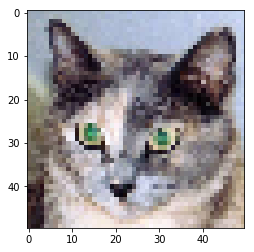

In [8]:
from keras.models import load_model
import os
model = load_model('cats_and_dogs_small_1.h5')
from keras.preprocessing import image
import numpy as np
img = image.load_img(os.path.join(base_dir, 'test','cats','cat.1700.jpg'), target_size = (50,50))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor/=255.
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

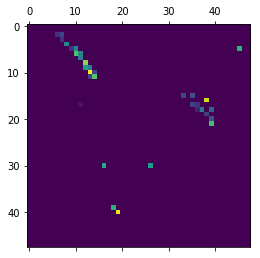

In [10]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4], cmap = 'viridis')

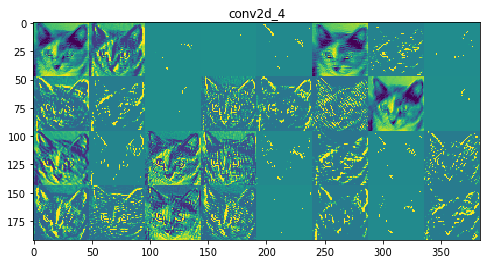

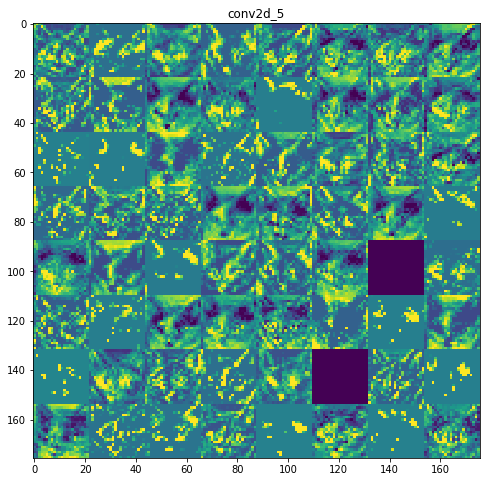

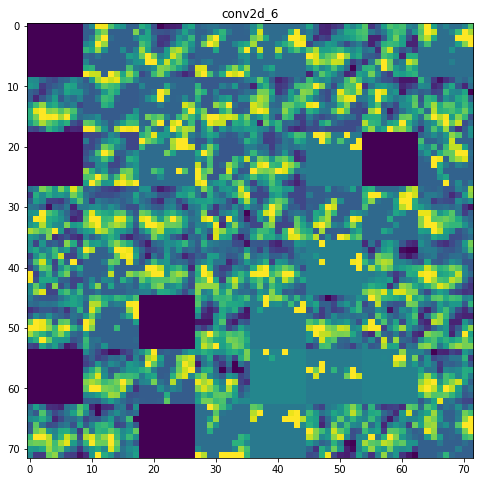

In [33]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 8
for layer_name, layer_activation in zip(layer_names, activations):
    if "conv" not in layer_name:
        # Hack to filter none 4-d shaped layers
        continue
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid= np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row + row]
            channel_image -= channel_image.mean();
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize =(scale*display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')
    

IndexError: list index out of range